# **Smart Factory Energy Prediction Challenge**

**Goal of this project**: Develop a robust and interpretable machine learning model to predict the target variable (e.g., energy consumption, demand, or operational output) using environmental and temporal features. By accurately forecasting the target, our objective is to support data-driven decision-making, optimize resource allocation, and identify key factors influencing system behavior — ultimately contributing to operational efficiency and strategic planning.

## Loading Libraries and data 

In [36]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

In [2]:
df = pd.read_csv("data.csv")

In [3]:
df.head()

,timestamp,equipment_energy_consumption,lighting_energy,zone1_temperature,zone1_humidity,zone2_temperature,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
0,2016-01-11 17:00:00,60.0,-77.78778596503064,33.74660933896648,47.59666666666671,19.2,44.790000,19.79,NaN,19.000000,...,17.033333,45.53,6.600000,733.5,92.0,7.000000,63.000000,5.300000,13.275433,13.275433
1,2016-01-11 17:10:00,60.0,30.0,19.89,46.69333333333329,19.2,44.722500,19.79,44.790000,19.000000,...,17.066667,45.56,6.483333,733.6,92.0,6.666667,59.166667,5.200000,18.606195,18.606195
2,2016-01-11 17:20:00,50.0,30.0,19.89,46.3,19.2,44.626667,19.79,44.933333,35.921144,...,17.000000,45.50,6.366667,733.7,92.0,6.333333,55.333333,5.100000,28.642668,28.642668
3,2016-01-11 17:30:00,50.0,40.0,33.74660933896648,46.0666666666667,19.2,44.590000,19.79,45.000000,NaN,...,17.000000,45.40,6.250000,733.8,92.0,6.000000,51.500000,37.673716,45.410389,45.410389
4,2016-01-11 17:40:00,60.0,40.0,19.89,46.33333333333329,19.2,44.530000,19.79,45.000000,18.890000,...,4.476511,45.40,6.133333,733.9,92.0,5.666667,47.666667,4.900000,10.084097,10.084097


## Exploratory Data Analysis

#### Data Cleaning

In [4]:
df.shape

(16857, 29)

In [5]:
df.describe()

,zone2_humidity,zone3_temperature,zone3_humidity,zone4_temperature,zone4_humidity,zone5_temperature,zone5_humidity,zone6_temperature,zone6_humidity,zone7_temperature,...,zone9_temperature,zone9_humidity,outdoor_temperature,atmospheric_pressure,outdoor_humidity,wind_speed,visibility_index,dew_point,random_variable1,random_variable2
count,15990.000000,16055.000000,15979.000000,16041.000000,16076.000000,16019.000000,16056.000000,16009.000000,16010.000000,16063.000000,...,16084.000000,15969.000000,16051.000000,16015.000000,16058.000000,16029.000000,16042.000000,16031.000000,16031.000000,16033.000000
mean,39.494553,21.665733,38.201314,20.239922,37.945608,19.052613,50.289131,6.469934,59.162913,19.672472,...,18.851085,40.318199,6.218582,755.757602,78.977595,4.195988,38.457150,2.783507,24.854981,25.093780
std,10.129513,2.594309,10.144388,2.783050,10.769813,2.346158,18.722516,8.867993,52.657787,2.879815,...,2.528783,11.168678,7.554684,13.643585,28.565660,4.409729,21.318655,6.094732,26.214960,25.523631
min,-77.265503,6.543921,-71.406273,4.613485,-81.446225,5.921094,-141.640143,-42.987365,-353.393026,3.578021,...,4.476511,-81.582494,-37.524768,678.159940,-221.668765,-20.929527,-82.329792,-32.098095,-120.170177,-120.409590
25%,37.757500,20.533333,36.592500,19.266667,35.200000,18.061111,45.290000,2.930000,37.066667,18.500000,...,17.890000,38.230000,3.000000,750.800000,71.000000,2.000000,29.000000,0.450000,12.179924,12.193789
50%,40.293333,21.767500,38.400000,20.290000,38.090000,19.050000,48.854429,6.263333,62.766667,19.600000,...,18.890000,40.363333,6.000000,756.200000,84.166667,4.000000,40.000000,2.750000,24.866978,24.834261
75%,43.000000,22.760000,41.433333,21.356667,41.560833,20.100000,53.918333,9.690000,86.590000,21.000000,...,20.200000,43.790000,9.250000,762.100000,91.988095,6.000000,40.000000,5.308333,37.950236,37.971764
max,77.265503,36.823982,71.406273,35.921144,81.446225,32.157594,141.640143,55.932271,353.393026,35.712952,...,33.238012,81.582494,49.853906,833.392675,221.668765,29.318719,159.606156,37.673716,170.156325,170.329617


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16857 entries, 0 to 16856
Data columns (total 29 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   timestamp                     16857 non-null  object 
 1   equipment_energy_consumption  16013 non-null  object 
 2   lighting_energy               16048 non-null  object 
 3   zone1_temperature             15990 non-null  object 
 4   zone1_humidity                16056 non-null  object 
 5   zone2_temperature             16004 non-null  object 
 6   zone2_humidity                15990 non-null  float64
 7   zone3_temperature             16055 non-null  float64
 8   zone3_humidity                15979 non-null  float64
 9   zone4_temperature             16041 non-null  float64
 10  zone4_humidity                16076 non-null  float64
 11  zone5_temperature             16019 non-null  float64
 12  zone5_humidity                16056 non-null  float64
 13  z

In [7]:
# Convert all columns except 'timestamp' to numeric
for col in df.columns:
    if col != 'timestamp':
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [8]:
df.isnull().sum()

timestamp                         0
equipment_energy_consumption    912
lighting_energy                 864
zone1_temperature               949
zone1_humidity                  888
zone2_temperature               923
zone2_humidity                  867
zone3_temperature               802
zone3_humidity                  878
zone4_temperature               816
zone4_humidity                  781
zone5_temperature               838
zone5_humidity                  801
zone6_temperature               848
zone6_humidity                  847
zone7_temperature               794
zone7_humidity                  805
zone8_temperature               848
zone8_humidity                  777
zone9_temperature               773
zone9_humidity                  888
outdoor_temperature             806
atmospheric_pressure            842
outdoor_humidity                799
wind_speed                      828
visibility_index                815
dew_point                       826
random_variable1            

In [9]:
df = df.dropna(subset=['equipment_energy_consumption'])

zone_cols = [col for col in df.columns if 'zone' in col]
df[zone_cols] = df[zone_cols].fillna(df[zone_cols].median())

weather_cols = ['outdoor_temperature', 'atmospheric_pressure', 'outdoor_humidity', 
                'wind_speed', 'visibility_index', 'dew_point']
df[weather_cols] = df[weather_cols].fillna(df[weather_cols].median())

df['lighting_energy'] = df['lighting_energy'].fillna(df['lighting_energy'].median())
df['random_variable1'] = df['random_variable1'].fillna(df['random_variable1'].median())
df['random_variable2'] = df['random_variable2'].fillna(df['random_variable2'].median())

In [10]:
df.isnull().sum()

timestamp                       0
equipment_energy_consumption    0
lighting_energy                 0
zone1_temperature               0
zone1_humidity                  0
zone2_temperature               0
zone2_humidity                  0
zone3_temperature               0
zone3_humidity                  0
zone4_temperature               0
zone4_humidity                  0
zone5_temperature               0
zone5_humidity                  0
zone6_temperature               0
zone6_humidity                  0
zone7_temperature               0
zone7_humidity                  0
zone8_temperature               0
zone8_humidity                  0
zone9_temperature               0
zone9_humidity                  0
outdoor_temperature             0
atmospheric_pressure            0
outdoor_humidity                0
wind_speed                      0
visibility_index                0
dew_point                       0
random_variable1                0
random_variable2                0
dtype: int64

In [11]:
# Convert timestamps into useful features
df['timestamp'] = pd.to_datetime(df['timestamp'])
df['hour'] = df['timestamp'].dt.hour
df['dayofweek'] = df['timestamp'].dt.dayofweek
df['month'] = df['timestamp'].dt.month

#### Visualizations

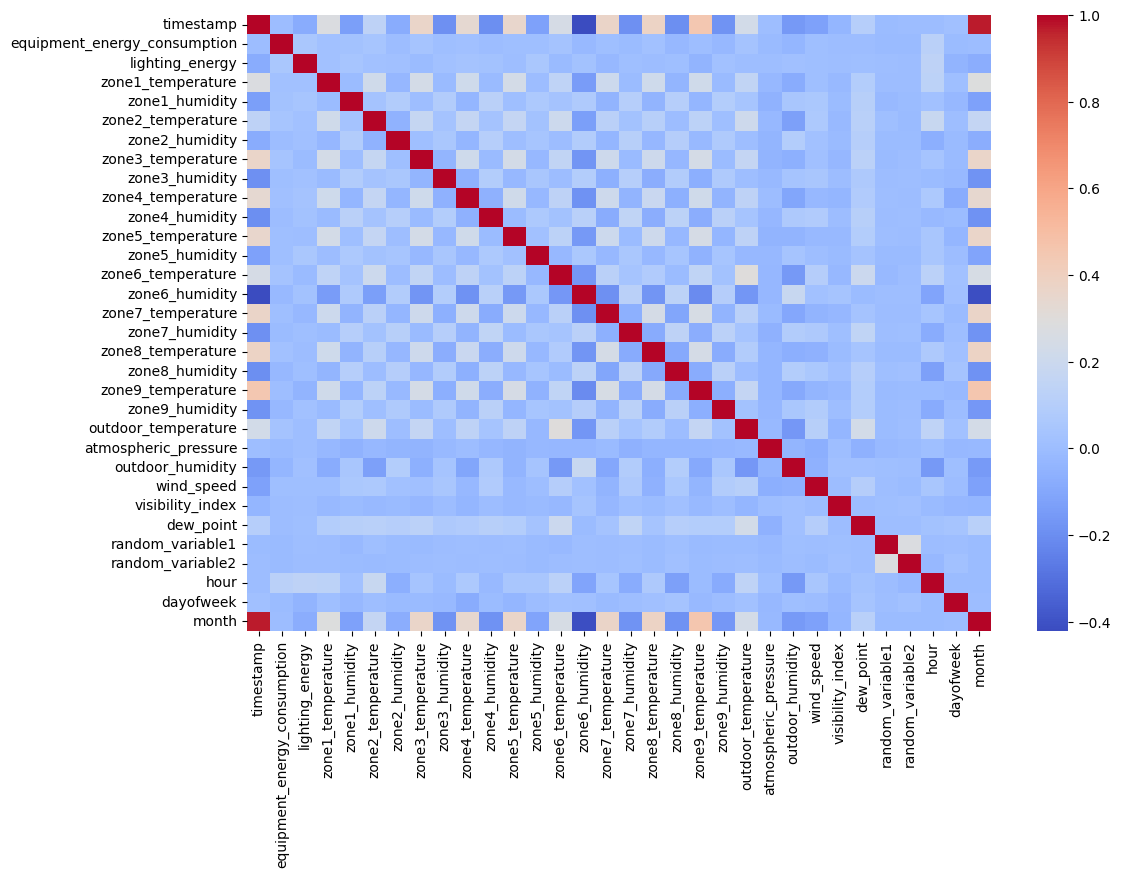

In [12]:
# Heatmap for correlations
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)
plt.show()

<Axes: xlabel='lighting_energy', ylabel='equipment_energy_consumption'>

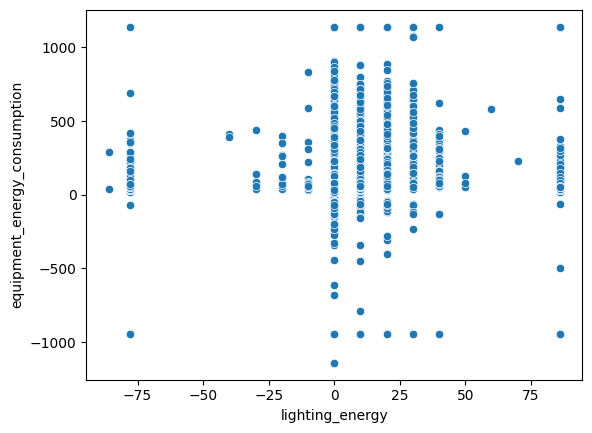

In [13]:
sns.scatterplot(x='lighting_energy', y='equipment_energy_consumption', data=df)

<Axes: xlabel='zone1_temperature', ylabel='equipment_energy_consumption'>

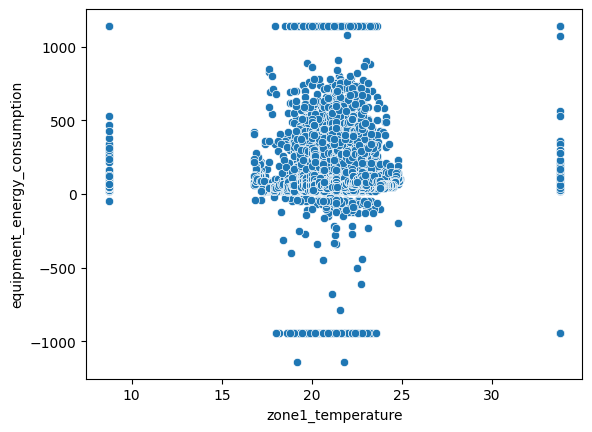

In [14]:
sns.scatterplot(x='zone1_temperature', y='equipment_energy_consumption', data=df)

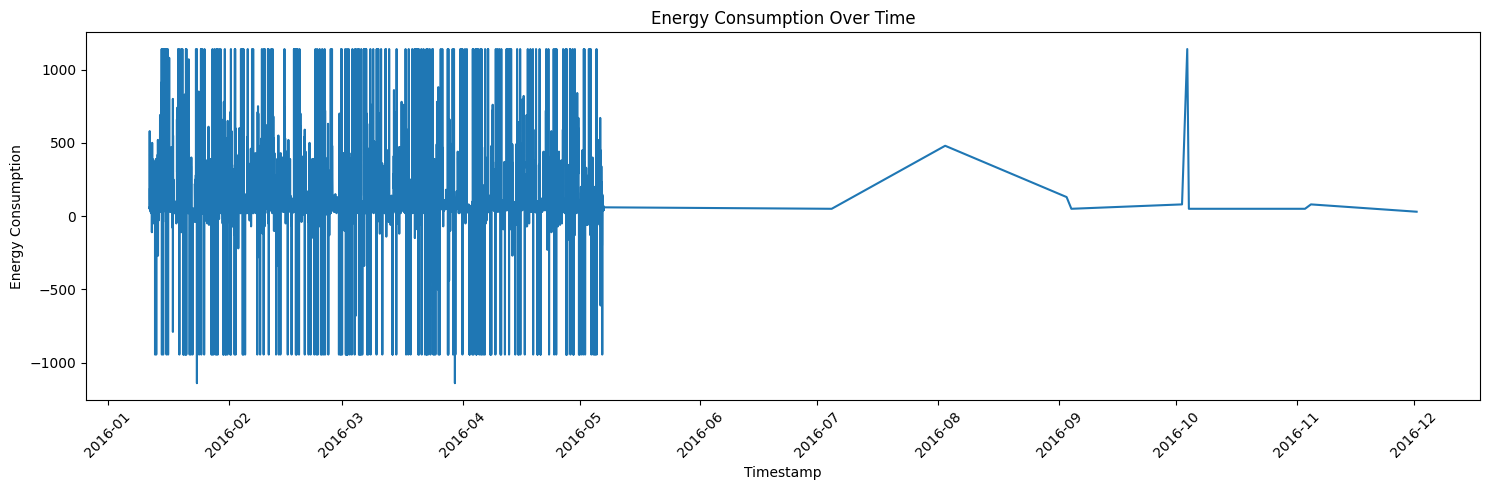

In [15]:
plt.figure(figsize=(15,5))
plt.plot(df['timestamp'], df['equipment_energy_consumption'])
plt.title('Energy Consumption Over Time')
plt.xlabel('Timestamp')
plt.ylabel('Energy Consumption')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

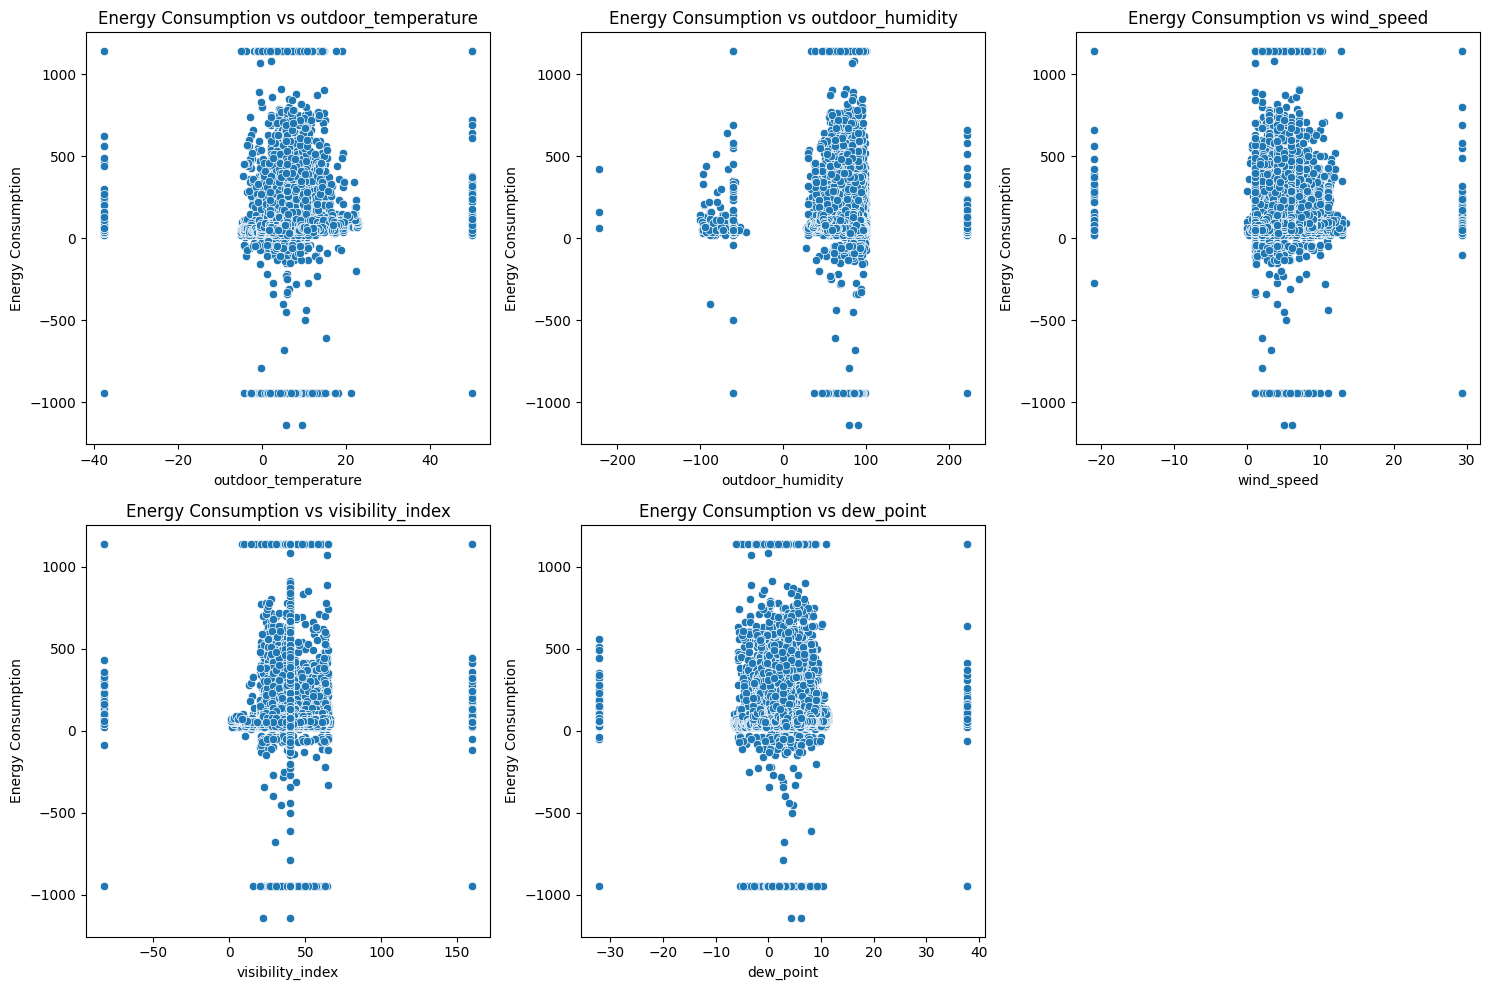

In [16]:
env_cols = ['outdoor_temperature', 'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point']

plt.figure(figsize=(15, 10))

for i, col in enumerate(env_cols):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns grid
    sns.scatterplot(x=df[col], y=df['equipment_energy_consumption'])
    plt.title(f'Energy Consumption vs {col}')
    plt.xlabel(col)
    plt.ylabel('Energy Consumption')

plt.tight_layout()
plt.show()


Most features showed weak or no clear trend with the target variable (`equipment_energy_consumption`). This may be due to outliers or nonlinear patterns.
<br>
The plot shows a very scattered pattern with no clear linear trend.
<br>
Data points are spread across a wide range (including negative values), which may suggest:
- Presence of outliers or errors
- Non-linear relationship
- Possibly categorical or noisy variable

#### Handling Outliers

To detect outliers, I used boxplots and calculated the IQR (Interquartile Range). The boxplot for equipment_energy_consumption showed extreme values on both ends, indicating the presence of outliers.

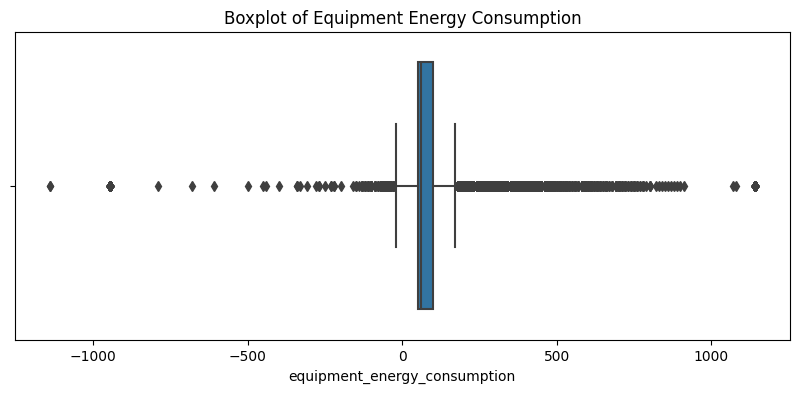

In [17]:
plt.figure(figsize=(10, 4))
sns.boxplot(x=df['equipment_energy_consumption'])
plt.title('Boxplot of Equipment Energy Consumption')
plt.show()

In [18]:
Q1 = df['equipment_energy_consumption'].quantile(0.25)
Q3 = df['equipment_energy_consumption'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Print how many outliers
outliers = df[(df['equipment_energy_consumption'] < lower_bound) | 
              (df['equipment_energy_consumption'] > upper_bound)]
print(f"Number of outliers: {len(outliers)}")


Number of outliers: 2183


Using the IQR method, values outside 1.5 × IQR from Q1 and Q3 were considered outliers. 
<br>
I removed these outliers from the dataset to avoid skewing the model training and predictions.

In [19]:
df_cleaned = df[(df['equipment_energy_consumption'] >= lower_bound) & 
                (df['equipment_energy_consumption'] <= upper_bound)]

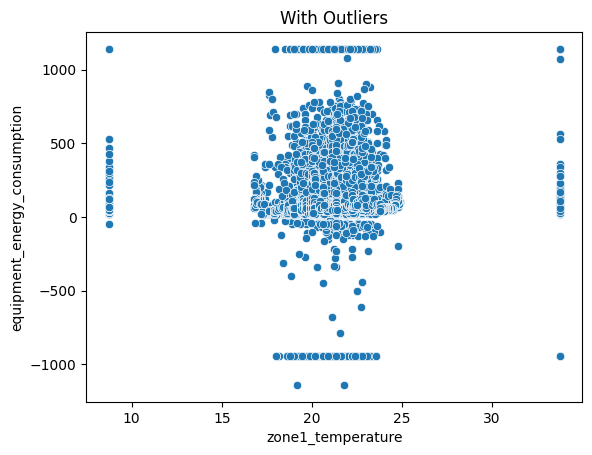

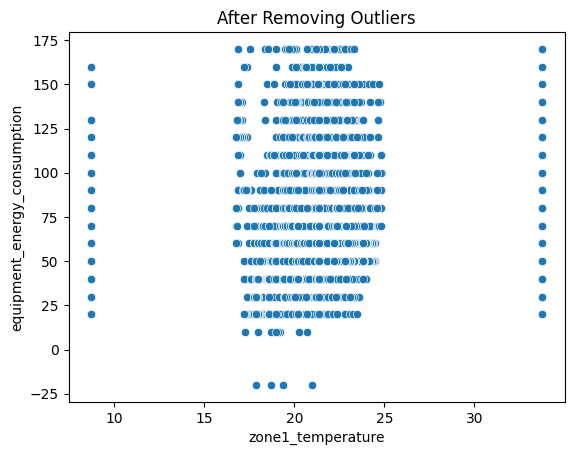

In [20]:
# Before
sns.scatterplot(x='zone1_temperature', y='equipment_energy_consumption', data=df)
plt.title("With Outliers")
plt.show()

# After
sns.scatterplot(x='zone1_temperature', y='equipment_energy_consumption', data=df_cleaned)
plt.title("After Removing Outliers")
plt.show()


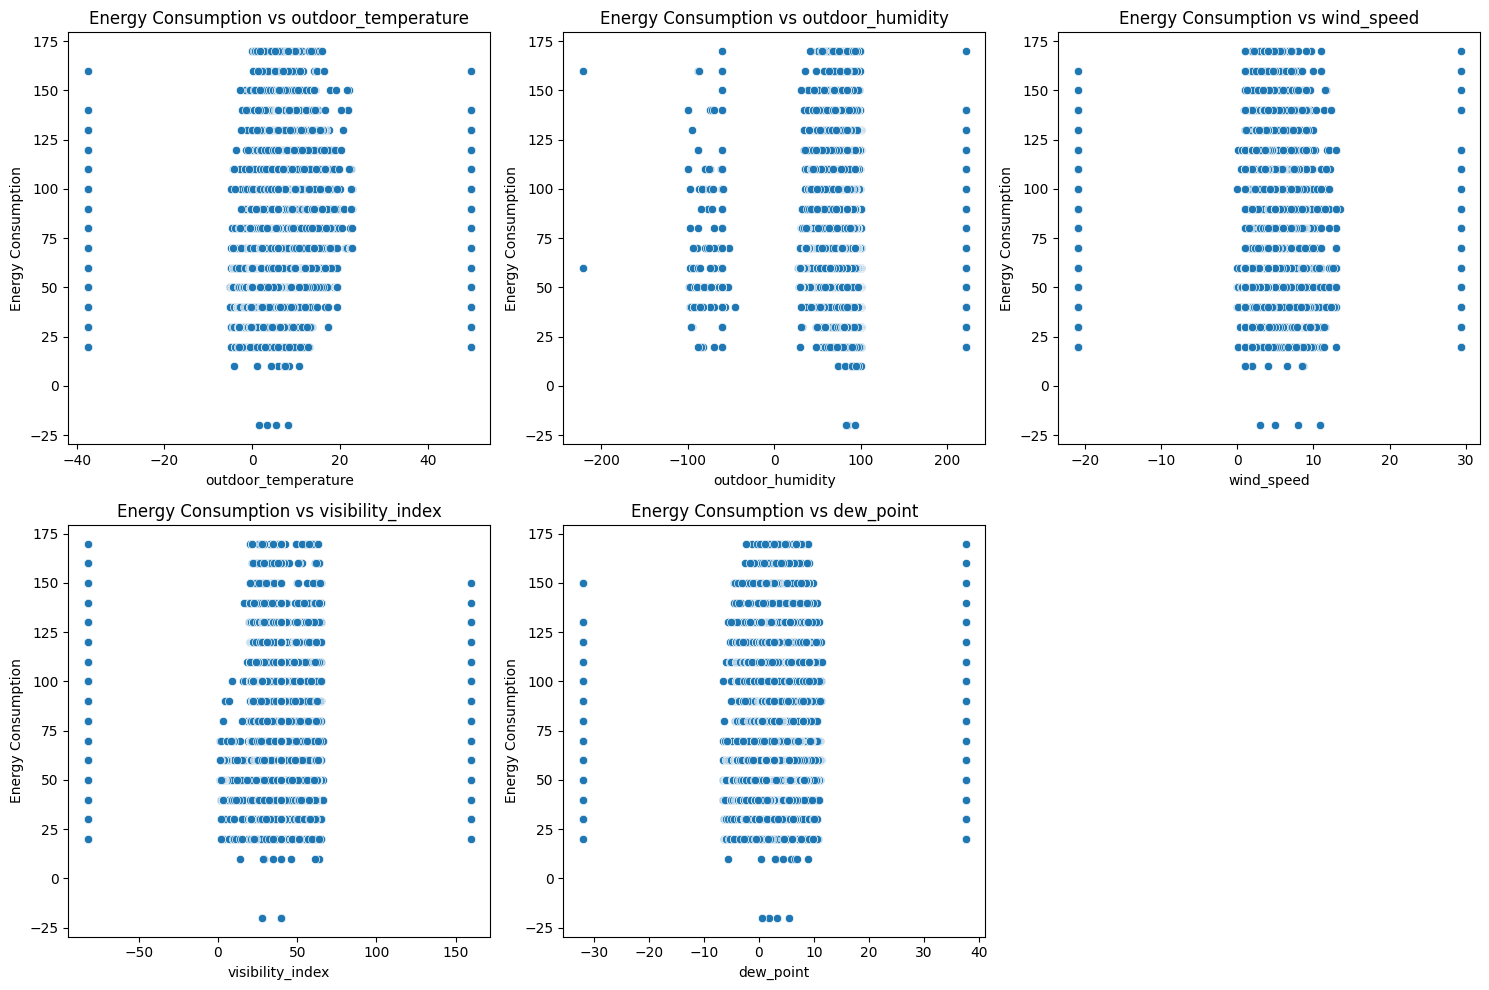

In [21]:
env_cols = ['outdoor_temperature', 'outdoor_humidity', 'wind_speed', 'visibility_index', 'dew_point']

plt.figure(figsize=(15, 10))

for i, col in enumerate(env_cols):
    plt.subplot(2, 3, i+1)  # 2 rows, 3 columns grid
    sns.scatterplot(x=df_cleaned[col], y=df_cleaned['equipment_energy_consumption'])
    plt.title(f'Energy Consumption vs {col}')
    plt.xlabel(col)
    plt.ylabel('Energy Consumption')

plt.tight_layout()
plt.show()

After handling outliers, we re-plotted the same relationships. While some noise was reduced, most variables still showed
weak direct correlation, 
suggesting that combinations or interactions may be more informative than individual features.

## Feature Engineering and Feature Selection

In [22]:
for col in df.columns:
    print(f"{col}: {df[col].nunique()} unique values")

timestamp: 15860 unique values
equipment_energy_consumption: 126 unique values
lighting_energy: 15 unique values
zone1_temperature: 420 unique values
zone1_humidity: 2117 unique values
zone2_temperature: 807 unique values
zone2_humidity: 2097 unique values
zone3_temperature: 845 unique values
zone3_humidity: 1945 unique values
zone4_temperature: 892 unique values
zone4_humidity: 2355 unique values
zone5_temperature: 1592 unique values
zone5_humidity: 6030 unique values
zone6_temperature: 3062 unique values
zone6_humidity: 8065 unique values
zone7_temperature: 1398 unique values
zone7_humidity: 4742 unique values
zone8_temperature: 1630 unique values
zone8_humidity: 5170 unique values
zone9_temperature: 504 unique values
zone9_humidity: 2323 unique values
outdoor_temperature: 1420 unique values
atmospheric_pressure: 2071 unique values
outdoor_humidity: 594 unique values
wind_speed: 161 unique values
visibility_index: 371 unique values
dew_point: 1138 unique values
random_variable1: 1474

Columns that represent categorical data: hour, day of week, month 
<br>
We will  convert these to categorical type.

In [23]:
df['hour'] = df['hour'].astype('category')
df['dayofweek'] = df['dayofweek'].astype('category')
df['month'] = df['month'].astype('category')

In [24]:
for col in ['hour', 'dayofweek', 'month']:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])

In [25]:
# Feature Selection
print(df[['random_variable1', 'random_variable2', 'equipment_energy_consumption']].corr())

                              random_variable1  random_variable2  \
random_variable1                      1.000000          0.277244   
random_variable2                      0.277244          1.000000   
equipment_energy_consumption         -0.015799         -0.011094   

                              equipment_energy_consumption  
random_variable1                                 -0.015799  
random_variable2                                 -0.011094  
equipment_energy_consumption                      1.000000  


In [26]:
from sklearn.feature_selection import mutual_info_regression

X_temp = df[['random_variable1', 'random_variable2']]
y = df['equipment_energy_consumption']

mi_scores = mutual_info_regression(X_temp, y, random_state=42)
mi_df = pd.DataFrame({'Feature': X_temp.columns, 'MI Score': mi_scores})
print(mi_df)

            Feature  MI Score
0  random_variable1  0.006722
1  random_variable2  0.007682


We evaluated the usefulness of **random_variable1** and **random_variable2** using correlation and mutual information.

- Pearson correlation with the target was close to zero (−0.015 and −0.011), indicating no linear relationship.
- Mutual Information scores were also very low (~0.007), suggesting no significant non-linear relationship.

Hence, we decided to exclude these variables from modeling to avoid introducing noise.

## Model Training (Train-Test split)

In [27]:
X = df_cleaned.drop(columns=['equipment_energy_consumption', 'timestamp','random_variable1', 'random_variable2'])
y = df_cleaned['equipment_energy_consumption']

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [28]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

## Model evaluation and testing

In [29]:
# Linear Regression
lr = LinearRegression()
lr.fit(X_train, y_train)
y_pred_lr = lr.predict(X_test)

print("Linear Regression:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_lr)))
print("MAE:", mean_absolute_error(y_test, y_pred_lr))
print("R²:", r2_score(y_test, y_pred_lr))

Linear Regression:
RMSE: 25.301991250006218
MAE: 19.060780099585312
R²: 0.2289617271355594


Linear Regression underperformed significantly:
- It had a low R² (0.229), meaning it could only explain about 23% of the variance in equipment energy consumption.
- This suggests the relationship between the features and target is non-linear, which linear regression cannot capture well.

In [30]:
# Random Forest
rf_model = RandomForestRegressor(random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

print("\nRandom Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_rf))
print("R²:", r2_score(y_test, y_pred_rf))


Random Forest:
RMSE: 16.75976774145597
MAE: 11.63218307301126
R²: 0.6616995890146948


Random Forest Regressor performed much better:
- Achieved a R² of 0.662, meaning it explained 66% of the variance, which is a substantial improvement.
- Lower RMSE and MAE values also confirm that its predictions are much closer to actual values.

In [31]:
# Lets try hyperparameter tuning with random forest
param_dist = {
    'n_estimators': [100, 200, 300],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

In [32]:
# Randomized search
random_search = RandomizedSearchCV(
    estimator=RandomForestRegressor(random_state=42),
    param_distributions=param_dist,
    n_iter=10,
    cv=5,
    scoring='r2',
    n_jobs=-1,
    random_state=42
)

In [33]:
# Fit the model
random_search.fit(X_train, y_train)

# Predict on test set
best_rf = random_search.best_estimator_
y_pred_best_rf = best_rf.predict(X_test)

# Evaluation
print("\nTuned Random Forest:")
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_pred_best_rf)))
print("MAE:", mean_absolute_error(y_test, y_pred_best_rf))
print("R²:", r2_score(y_test, y_pred_best_rf))


Tuned Random Forest:
RMSE: 16.561220862226534
MAE: 11.526478084513863
R²: 0.6696675551010525


After training and tuning the Random Forest Regressor, the model was evaluated using the test dataset. The following performance metrics were calculated:

- **R² Score:** 0.669  
  → Indicates that the model explains approximately 66.9% of the variance in the target variable.

- **Root Mean Squared Error (RMSE):** 16.56  
  → Shows the standard deviation of prediction errors. Lower RMSE suggests better fit.

- **Mean Absolute Error (MAE):** 11.52  
  → On average, the predictions are off by 11.52 units.
   <br>
Despite hyperparameter tuning using RandomizedSearchCV, the R² score only slightly improved from 0.662 to 0.669. This suggests that the default RandomForestRegressor was already performing near optimally on this dataset. Further gains may require different models or feature engineering.

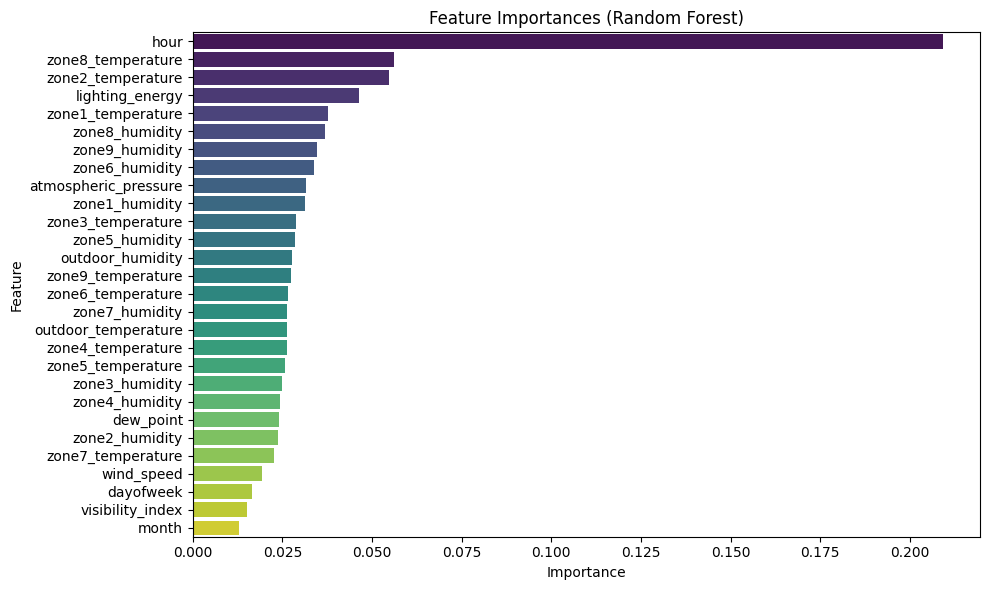

In [41]:
# Get feature importances
importances = best_rf.feature_importances_
feature_names = X.columns

# Create a DataFrame
feat_imp_df = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp_df = feat_imp_df.sort_values(by='Importance', ascending=False)

# Plot
plt.figure(figsize=(10, 6))
sns.barplot(data=feat_imp_df, x='Importance', y='Feature', palette='viridis')
plt.title('Feature Importances (Random Forest)')
plt.tight_layout()
plt.show()

The feature importance analysis shows that **'hour'** has the highest contribution (~0.25) to the model’s decision-making. This indicates that the target variable (e.g., energy consumption) varies significantly with the time of day. Such temporal patterns are common in energy systems where usage typically peaks during working hours and dips at night.

C:\Users\NISHITA\AppData\Local\Temp\ipykernel_23424\3593754437.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour


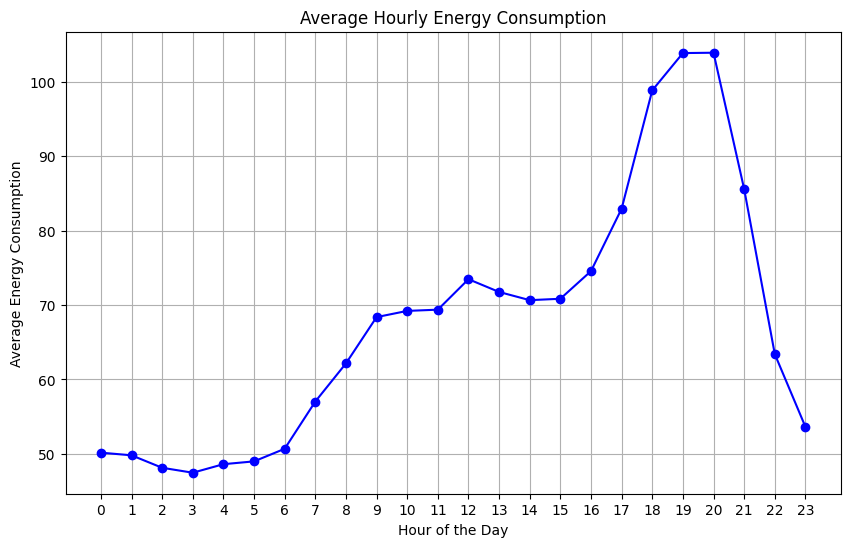

In [45]:
df_cleaned['hour'] = df_cleaned['timestamp'].dt.hour
hourly_energy = df_cleaned.groupby('hour')['equipment_energy_consumption'].mean()
plt.figure(figsize=(10, 6))
plt.plot(hourly_energy.index, hourly_energy.values, marker='o', linestyle='-', color='b')
plt.title('Average Hourly Energy Consumption')
plt.xlabel('Hour of the Day')
plt.ylabel('Average Energy Consumption')
plt.xticks(range(24))  # To show each hour on the x-axis
plt.grid(True)
plt.show()

The model is showing that energy consumption is highest around 7 PM to 8 PM, indicating that during these hours, the equipment or systems are likely using more energy. This could be due to:

- Increased activity during the evening (e.g., more people are active or equipment is running at full capacity).
- Peak operational hours where usage is naturally higher.

In [43]:
# Compare actual vs predicted
comparison_df = pd.DataFrame({
    'Actual': y_test.values,
    'Predicted': y_pred_best_rf
})

comparison_df.head(10)

,Actual,Predicted
0,70.0,73.500000
1,50.0,43.527778
2,90.0,91.772222
3,50.0,48.413889
4,70.0,75.775000
5,120.0,83.602778
6,40.0,41.133333
7,60.0,50.375000
8,50.0,45.152778
9,60.0,53.669444


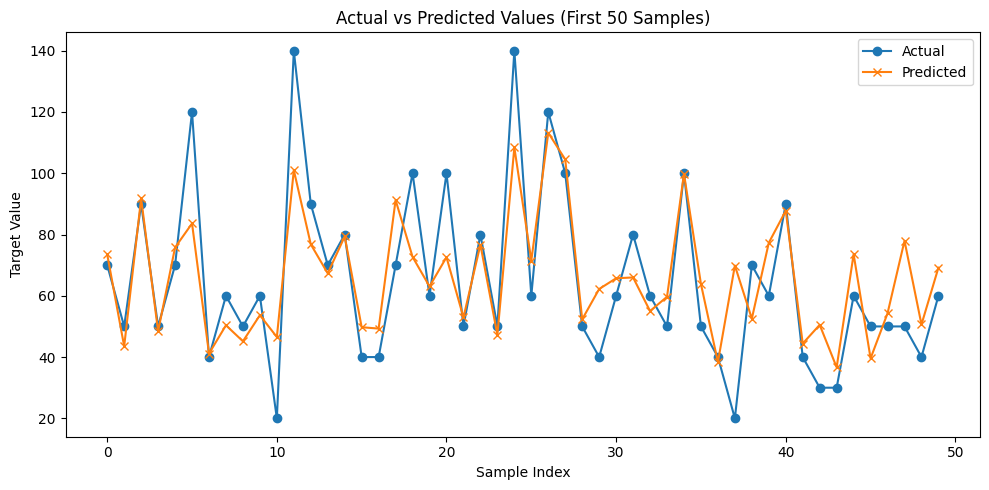

In [44]:
# Scatter plot or line plot
plt.figure(figsize=(10, 5))
plt.plot(y_test.values[:50], label='Actual', marker='o')
plt.plot(y_pred_best_rf[:50], label='Predicted', marker='x')
plt.title('Actual vs Predicted Values (First 50 Samples)')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.legend()
plt.tight_layout()
plt.show()

Most predictions are close to actual values, with small deviations. However, some higher-value targets (like 120 → 83.6) show underestimation, suggesting room for improvement.

Overall, the model performs reasonably well, but further improvements could be made using more advanced techniques (e.g., feature engineering, more tuning, or ensemble blending).

## Key Findings and Insights

As part of the data science team, we developed and evaluated a Random Forest Regressor to predict the target variable with a moderate level of accuracy. The final tuned model achieved an R² score of **0.669**, indicating that approximately **67% of the variance** in the target is explained by the model. The RMSE (~16.56) and MAE (~11.52) reflect acceptable prediction errors, suggesting the model is reasonably reliable for practical use.

**Feature Importance Analysis** revealed that:
- **Hour** was the most significant predictor (~0.20 importance), indicating that the target variable has a strong dependency on the time of day. This likely reflects underlying operational or environmental patterns, such as occupancy levels, activity cycles, or energy demand trends across the day.
- **Zone 8 Temperature** was the next important feature (~0.05), suggesting that specific local temperatures still influence the target but to a lesser extent.
- The model is showing that energy consumption is highest around 7 PM to 8 PM, indicating that during these hours, the equipment or systems are likely using more energy.

By reviewing both the model’s feature importance and its performance on unseen data:
- We confirmed that **temporal features play a dominant role**, and this insight can help the operations team in **scheduling, forecasting, or demand planning** based on time-of-day behavior.
- The **lower relative impact of individual zone temperatures** could be due to high inter-correlation between zones, or the possibility that temperature variation is not the primary driver of the target variable.

**Insights**:
- The model consistently predicts near-accurate values for medium-range targets (e.g., 50–90 units), though it shows slightly higher deviation for extreme values. This suggests potential benefit in further segmenting the data or applying localized models for different time zones or operational clusters.

By incorporating these insights, we can better align our predictive systems with actual usage patterns and explore ways to optimize performance, particularly during peak or anomalous periods.
